In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime
import json
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [4]:
data= pd.read_csv("/content/drive/MyDrive/MA_Package/data.csv")
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.52,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.81,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.54,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.46,Four-Door Car,Medsize
2,AI49188,Nevada,12887.43,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.47,Two-Door Car,Medsize
3,WW63253,California,7645.86,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.88,SUV,Medsize
4,HB64268,Washington,2813.69,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.13,Four-Door Car,Medsize


**Data Preprocessing**

In [5]:
data['Effective To Date']= data['Effective To Date'].astype('datetime64[ns]')

In [6]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [7]:
data.shape

(9134, 24)

In [8]:
data.drop_duplicates()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.52,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.81,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.54,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.46,Four-Door Car,Medsize
2,AI49188,Nevada,12887.43,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.47,Two-Door Car,Medsize
3,WW63253,California,7645.86,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.88,SUV,Medsize
4,HB64268,Washington,2813.69,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.13,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.99,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.23,Four-Door Car,Medsize
9130,PK87824,California,3096.51,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.20,Four-Door Car,Medsize
9131,TD14365,California,8163.89,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.78,Four-Door Car,Medsize
9132,UP19263,California,7524.44,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.20,Four-Door Car,Large


In [9]:
data.rename(columns={'Customer Lifetime Value':'Customer_Lifetime_Value'}, inplace=True)

#Exploratory Data Analysis

In [10]:
data.describe()

,Customer_Lifetime_Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00
mean,8004.94,37657.38,93.22,15.10,48.06,0.38,2.97,434.09
std,6870.97,30379.90,34.41,10.07,27.91,0.91,2.39,290.50
min,1898.01,0.00,61.00,0.00,0.00,0.00,1.00,0.10
25%,3994.25,0.00,68.00,6.00,24.00,0.00,1.00,272.26
50%,5780.18,33889.50,83.00,14.00,48.00,0.00,2.00,383.95
75%,8962.17,62320.00,109.00,23.00,71.00,0.00,4.00,547.51
max,83325.38,99981.00,298.00,35.00,99.00,5.00,9.00,2893.24


In [11]:
data.columns

Index(['Customer', 'State', 'Customer_Lifetime_Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

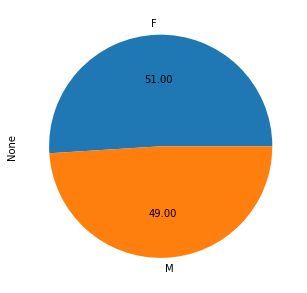

In [12]:
plt.figure(figsize=(5,10))
data.groupby('Gender').size().plot(kind='pie', autopct='%.2f')

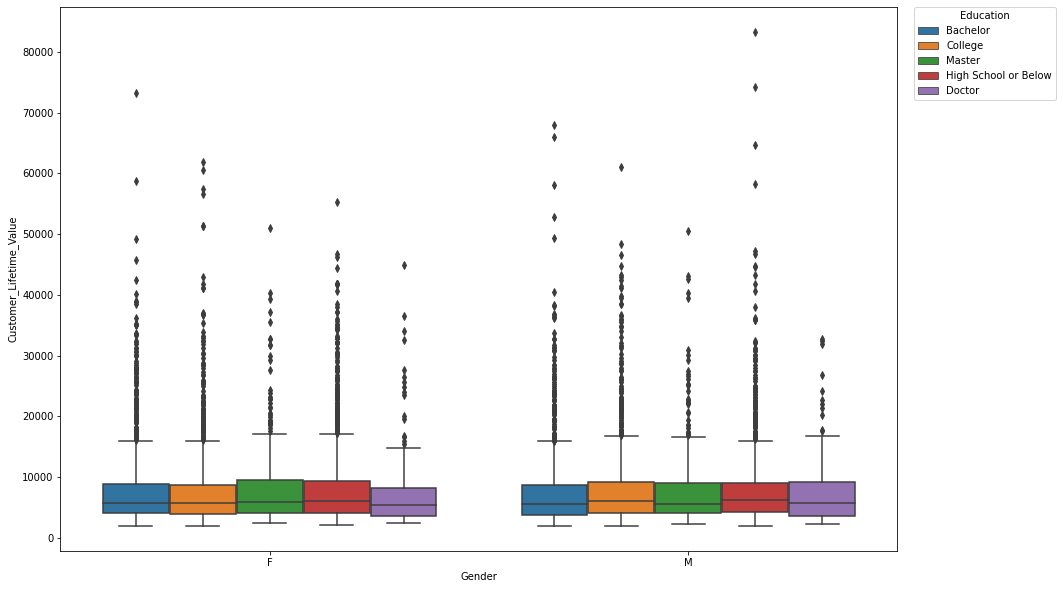

In [13]:
plt.figure(figsize=(15,10))
sns.boxplot(x ='Gender', y ='Customer_Lifetime_Value', data = data, hue ='Education')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Education')

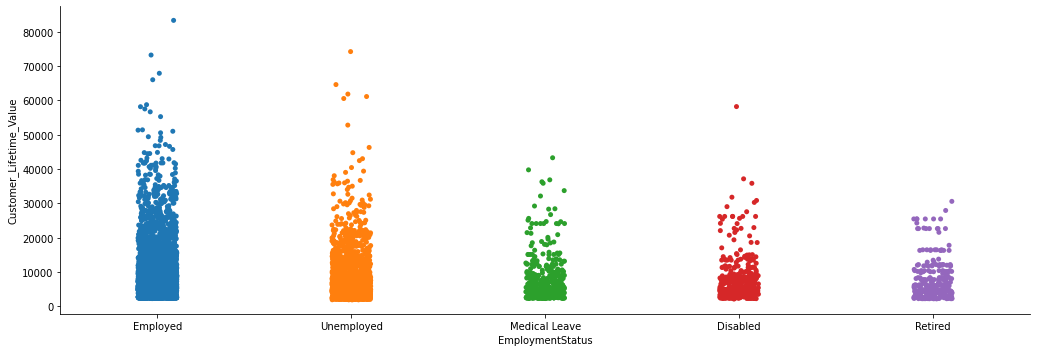

In [14]:
g = sns.catplot(x="EmploymentStatus", y="Customer_Lifetime_Value", data=data)
g.fig.set_size_inches(17,5)

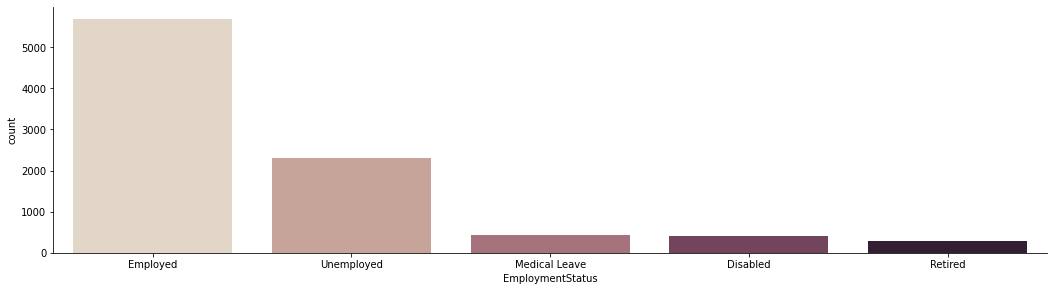

In [15]:
g = sns.catplot(x="EmploymentStatus", kind="count", palette="ch:.25", data=data)
g.fig.set_size_inches(17,4)

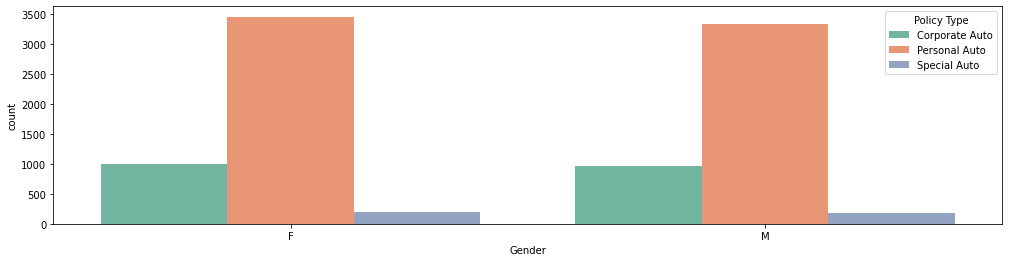

In [16]:
plt.figure(figsize=(17, 4))
g = sns.countplot(x ='Gender', hue = "Policy Type", data = data, palette = "Set2")

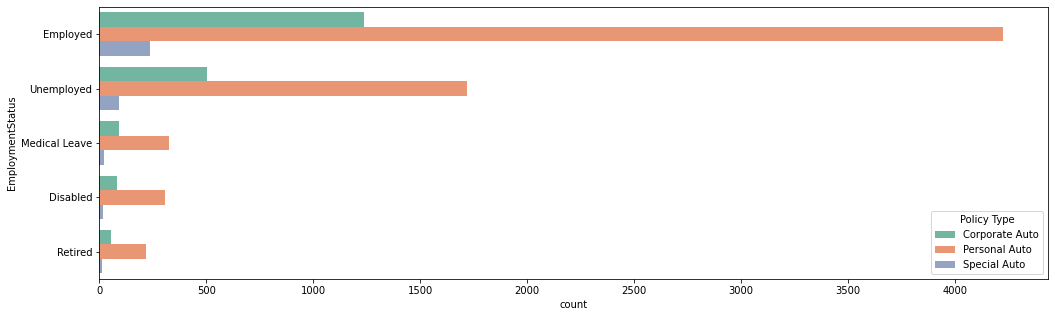

In [17]:
plt.figure(figsize=(17, 5))
g = sns.countplot(y ='EmploymentStatus', hue = "Policy Type", data = data, palette = "Set2")

In [18]:
dept_gender_salary =  data.groupby(['EmploymentStatus','Gender'],as_index=False).Customer_Lifetime_Value.mean()
print(dept_gender_salary)

  EmploymentStatus Gender  Customer_Lifetime_Value
0         Disabled      F                  7849.25
1         Disabled      M                  7845.82
2         Employed      F                  8440.17
3         Employed      M                  7983.97
4    Medical Leave      F                  6921.10
5    Medical Leave      M                  8349.32
6          Retired      F                  7527.80
7          Retired      M                  7454.67
8       Unemployed      F                  7546.52
9       Unemployed      M                  7722.55


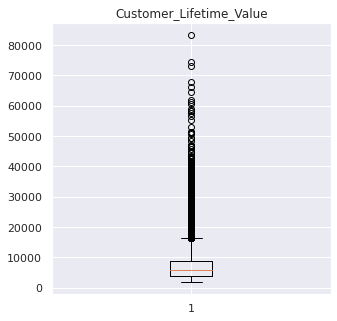

In [19]:
columns = ['Customer_Lifetime_Value']
sns.set(color_codes=True)
plt.figure(figsize=(5,5))
plt.subplots_adjust(hspace=0.5)
plt.subplot(1,1,1)
plt.boxplot(data[columns[0]])
plt.title(columns[0])   
plt.show()

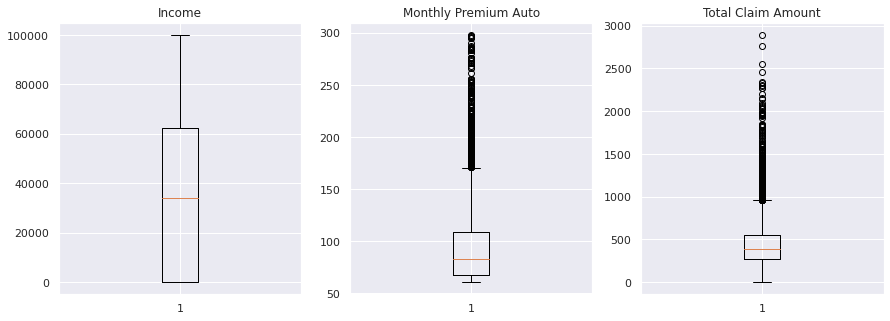

In [20]:
columns = ['Income','Monthly Premium Auto','Total Claim Amount']
sns.set(color_codes=True)
plt.figure(figsize=(20,5))
plt.subplots_adjust(hspace=0.5)
for i in range(len(columns)):
    plt.subplot(1,4,i+1)
    plt.boxplot(data[columns[i]])
    plt.title(columns[i])   
plt.show()

**As we can see, there are outliers in the total claim amount and in monthly premium auto, usually we remove the outliers for a better model. Since our dataset is related to insurance industry, outliers can be our potential customer. There are no outliers in the income.**

<Figure size 432x288 with 0 Axes>

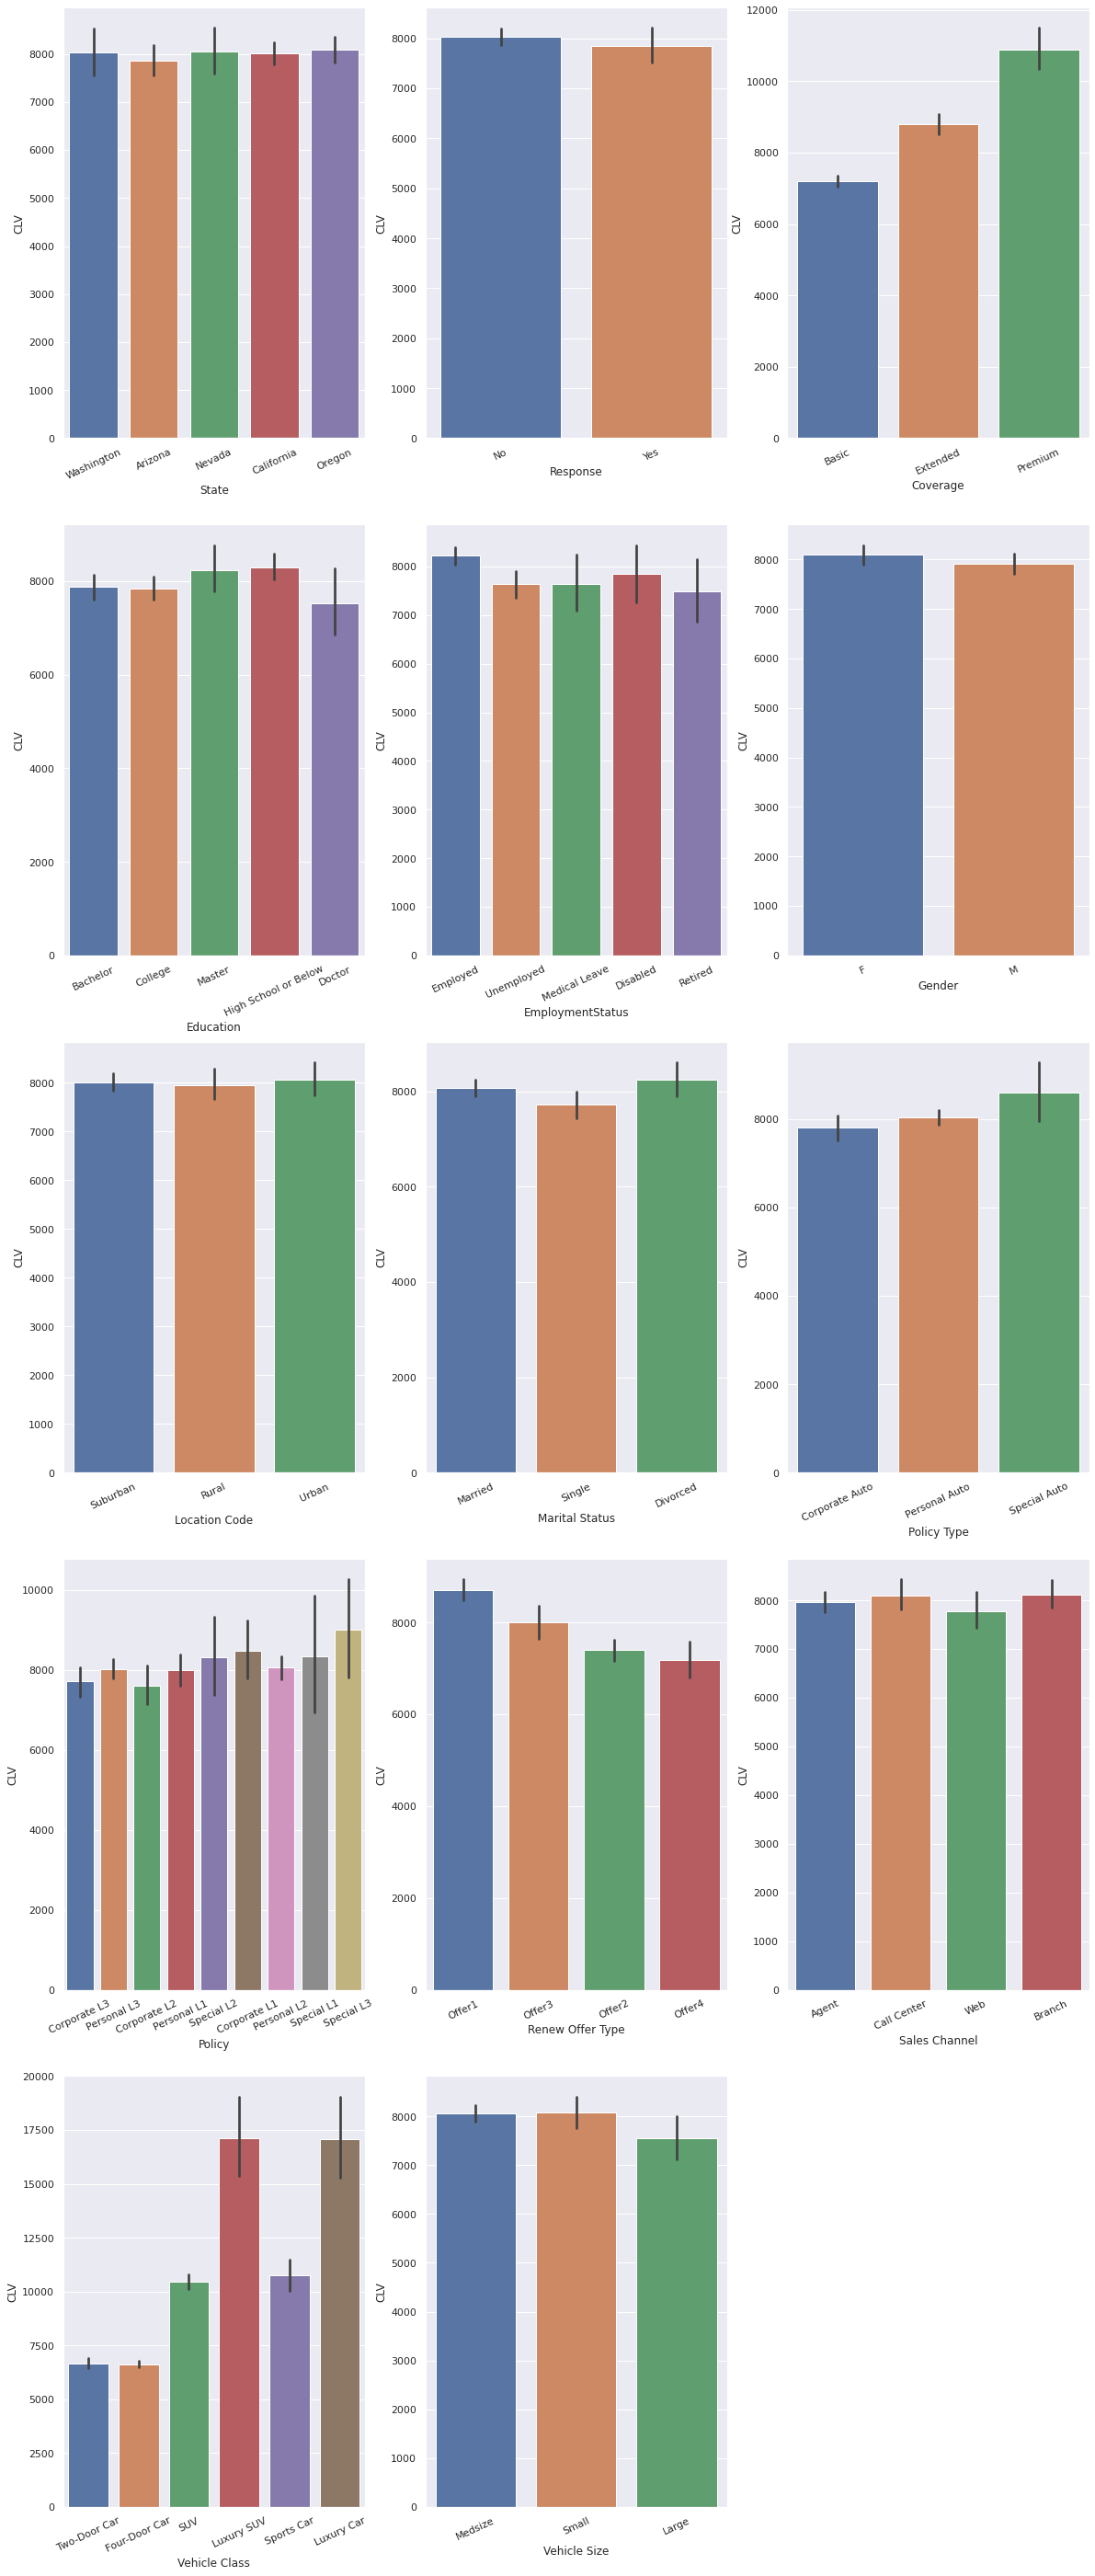

In [21]:
catogorical_data = data.select_dtypes(include='object')
catogorical_data = catogorical_data.drop(['Customer'], axis = 1)
columns = catogorical_data.columns
sns.set(color_codes=True)
plt.subplots_adjust(hspace=0.7)
plt.figure(figsize=(20,50))
for i in range(len(columns)):
    plt.subplot(5,3,i+1)
    sns.barplot(x = columns[i],y='Customer_Lifetime_Value',data = data)
    plt.ylabel('CLV')
    plt.xticks(rotation=25)
plt.show()

#Statistical Analysis

pvalue < 0.05 shows that there is significant difference in the mean of target variable for at least one group of independent variable that means independent variable could be a significant feature for predicting 'Customer Lifetime Value'.

pvalue > 0.05 implies that there is no significant difference in the mean of target variable for independent variable which means independent variable is not significant for predicting 'Customer Lifetime Value'.

In [22]:
#Gender
Gender = data[['Customer_Lifetime_Value','Gender']].groupby('Gender')
Female = Gender['Customer_Lifetime_Value'].get_group('F')
Male = Gender['Customer_Lifetime_Value'].get_group('M')
stats.f_oneway(Female,Male)

F_onewayResult(statistic=1.6917849875830426, pvalue=0.193398656308463)

In [23]:
#Coverage
Coverage = data[['Customer_Lifetime_Value','Coverage']].groupby('Coverage')
Basic = Coverage['Customer_Lifetime_Value'].get_group('Basic')
Extended = Coverage['Customer_Lifetime_Value'].get_group('Extended')
Premium =Coverage['Customer_Lifetime_Value'].get_group('Premium')
stats.f_oneway(Basic,Extended,Premium)

F_onewayResult(statistic=133.67511419504905, pvalue=6.0158970099807e-58)

In [24]:
#Marital Status
Marital_status = data[['Customer_Lifetime_Value','Marital Status']].groupby('Marital Status')
Married = Marital_status['Customer_Lifetime_Value'].get_group('Married')
Single = Marital_status['Customer_Lifetime_Value'].get_group('Single')
stats.f_oneway(Married,Single)

F_onewayResult(statistic=4.758213335770564, pvalue=0.02918870155131268)

In [25]:
#Vehicle Class
Vehicleclass = data[['Customer_Lifetime_Value','Vehicle Class']].groupby('Vehicle Class')
Fourdoor = Vehicleclass['Customer_Lifetime_Value'].get_group('Four-Door Car')
Twodoor = Vehicleclass['Customer_Lifetime_Value'].get_group('Two-Door Car')
SUV = Vehicleclass['Customer_Lifetime_Value'].get_group('SUV')
LuxurySUV =Vehicleclass['Customer_Lifetime_Value'].get_group('Luxury SUV')
Luxurycar =Vehicleclass['Customer_Lifetime_Value'].get_group('Luxury Car')
Sportscar =Vehicleclass['Customer_Lifetime_Value'].get_group('Sports Car')
stats.f_oneway(Fourdoor,Twodoor,SUV,LuxurySUV,Luxurycar,Sportscar)

F_onewayResult(statistic=267.1581168024349, pvalue=2.085525760212929e-267)

In [26]:
#Renew Offer Type
Renewoffer = data[['Customer_Lifetime_Value','Renew Offer Type']].groupby('Renew Offer Type')
Offer1 = Renewoffer['Customer_Lifetime_Value'].get_group('Offer1')
Offer2 = Renewoffer['Customer_Lifetime_Value'].get_group('Offer2')
Offer3 = Renewoffer['Customer_Lifetime_Value'].get_group('Offer3')
Offer4 =Renewoffer['Customer_Lifetime_Value'].get_group('Offer4')
stats.f_oneway(Offer1,Offer2,Offer3,Offer4)

F_onewayResult(statistic=25.832614444940408, pvalue=1.238399930571374e-16)

In [27]:
#Employment Status
Employment_Status = data[['Customer_Lifetime_Value','EmploymentStatus']].groupby('EmploymentStatus')
Employed = Employment_Status['Customer_Lifetime_Value'].get_group('Employed')
Unemployed = Employment_Status['Customer_Lifetime_Value'].get_group('Unemployed')
Medleave = Employment_Status['Customer_Lifetime_Value'].get_group('Medical Leave')
Disabled = Employment_Status['Customer_Lifetime_Value'].get_group('Disabled')
Retired = Employment_Status['Customer_Lifetime_Value'].get_group('Retired')
stats.f_oneway(Employed,Unemployed,Medleave,Disabled,Retired)

F_onewayResult(statistic=3.8098087103286047, pvalue=0.00425058662383102)

In [28]:
#Education
Education = data[['Customer_Lifetime_Value','Education']].groupby('Education')
Bachelor = Education['Customer_Lifetime_Value'].get_group('Bachelor')
College = Education['Customer_Lifetime_Value'].get_group('College')
Highschool = Education['Customer_Lifetime_Value'].get_group('High School or Below')
Master = Education['Customer_Lifetime_Value'].get_group('Master')
Doctor = Education['Customer_Lifetime_Value'].get_group('Doctor')
stats.f_oneway(Bachelor,College,Highschool,Master,Doctor)

F_onewayResult(statistic=2.422865348052191, pvalue=0.04603615409468821)

#Modelling

In [29]:
#Removing columns with less importance with respect to CLV
data.drop(['State','Coverage','Renew Offer Type','Vehicle Class','Customer','Response','Gender','Location Code','Vehicle Size','Policy','Policy Type','Sales Channel','Effective To Date'],axis=1,inplace = True)

In [30]:
#mapping categorical values to numerics
Education_map = {'Bachelor':1, 'College':2, 'Master':3, 'High School or Below':4, 'Doctor':5}
data['Education'] = data['Education'].map(Education_map)
EmploymentStatus_map = {'Employed':1, 'Unemployed':2, 'Medical Leave':3, 'Disabled':4, 'Retired':5}
data['EmploymentStatus'] = data['EmploymentStatus'].map(EmploymentStatus_map)
MaritalStatus_map = {'Married':1, 'Single':2, 'Divorced':3}
data['Marital Status'] = data['Marital Status'].map(MaritalStatus_map)

In [31]:
data['Marital Status'].unique()

array([1, 2, 3])

In [32]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [33]:
y = data['Customer_Lifetime_Value']
x = data.drop('Customer_Lifetime_Value',axis=1)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
print('Train Data Count: {}'.format(x_train.shape[0]))
print('Test Data Count: {}'.format(x_test.shape[0]))

Train Data Count: 6850
Test Data Count: 2284


In [35]:
#Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)
y_prediction =  LR.predict(x_test)
r2score = r2_score(y_test,y_prediction)
print("R2 Score : ",r2score)

R2 Score :  0.12693045661961255


In [36]:
#Lasso Regression
Lasso_reg = Lasso(alpha=0.1)
Lasso_reg.fit(x_train,y_train)
y_prediction =  Lasso_reg.predict(x_test)
r2score = r2_score(y_test,y_prediction)
print("R2 Score : ",r2score)

R2 Score :  0.12692884456616038


In [37]:
#Ridge Regression
Ridge_reg = Ridge(alpha=0.1)
Ridge_reg.fit(x_train,y_train)
y_prediction =  Ridge_reg.predict(x_test)
r2score = r2_score(y_test,y_prediction)
print("R2 Score : ",r2score)

R2 Score :  0.12693045595728536


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
print('Train Data Count: {}'.format(x_train.shape[0]))
print('Test Data Count: {}'.format(x_test.shape[0]))
#Ordinary Least Square Regression
x_train = sm.add_constant(x_train)
ols = sm.OLS(y_train, x_train).fit()
x_test = sm.add_constant(x_test)
y_predictions = ols.predict(x_test)
rsquare = ols.rsquared
print("R2 Score : ",rsquare)

Train Data Count: 6850
Test Data Count: 2284
R2 Score :  0.16130415188422098


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [39]:
new_data = data.copy()
new_data = new_data.drop('Customer_Lifetime_Value',axis=1)
#using log transformation
pol = PolynomialFeatures()
#eg for polynomial feature of degree 2 is [1,a,b,a^2,ab,b^2]

dat = pol.fit_transform(new_data)
#fit_transform() - Fit to data, then transform it
new_dat = pd.DataFrame(dat)
new_dat.columns = pol.get_feature_names(new_data.columns)
#get_feature_names() - Get output feature names for transformation

x =  new_dat
y = np.log(data['Customer_Lifetime_Value'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
print('Train Data Count: {}'.format(x_train.shape[0]))
print('Test Data Count: {}'.format(x_test.shape[0]))
#OLS
x_train = sm.add_constant(x_train)
ols = sm.OLS(y_train, x_train).fit()
x_test = sm.add_constant(x_test)
y_predictions = ols.predict(x_test)
rsquare = ols.rsquared
print("R2 Score : ",rsquare)

Train Data Count: 6850
Test Data Count: 2284


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 Score :  0.4271450129344395


In [40]:
columns = ['Education', 'EmploymentStatus', 'Income',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount']
input = np.array([1,1,56223,1,50,22,3,0,1,344.81])
input = input.reshape(1, -1)
given = pd.DataFrame(input,columns=columns, index=[0])
input_data = pol.fit_transform(input)
input_dat = pd.DataFrame(input_data)
input_dat.columns = pol.get_feature_names(columns)
predictions = ols.predict(input_dat)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [41]:
print("Given Input : ")
print(given)

Given Input : 
   Education  EmploymentStatus   Income  Marital Status  Monthly Premium Auto  \
0       1.00              1.00 56223.00            1.00                 50.00   

   Months Since Last Claim  Months Since Policy Inception  \
0                    22.00                           3.00   

   Number of Open Complaints  Number of Policies  Total Claim Amount  
0                       0.00                1.00              344.81  


In [42]:
print("Input Data after Polynomial Features fit_transform : ")
print(input_dat)

Input Data after Polynomial Features fit_transform : 
     1  Education  EmploymentStatus   Income  Marital Status  \
0 1.00       1.00              1.00 56223.00            1.00   

   Monthly Premium Auto  Months Since Last Claim  \
0                 50.00                    22.00   

   Months Since Policy Inception  Number of Open Complaints  \
0                           3.00                       0.00   

   Number of Policies  ...  Months Since Policy Inception^2  \
0                1.00  ...                             9.00   

   Months Since Policy Inception Number of Open Complaints  \
0                                               0.00         

   Months Since Policy Inception Number of Policies  \
0                                              3.00   

   Months Since Policy Inception Total Claim Amount  \
0                                           1034.43   

   Number of Open Complaints^2  Number of Open Complaints Number of Policies  \
0                         0.00 

In [43]:
print("Customer Lifetime Value : ",np.exp(predictions[0]))

Customer Lifetime Value :  3113.270085651302


#Segmentation

In [44]:
data.columns

Index(['Customer_Lifetime_Value', 'Education', 'EmploymentStatus', 'Income',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount'],
      dtype='object')

In [45]:
from sklearn.cluster import KMeans

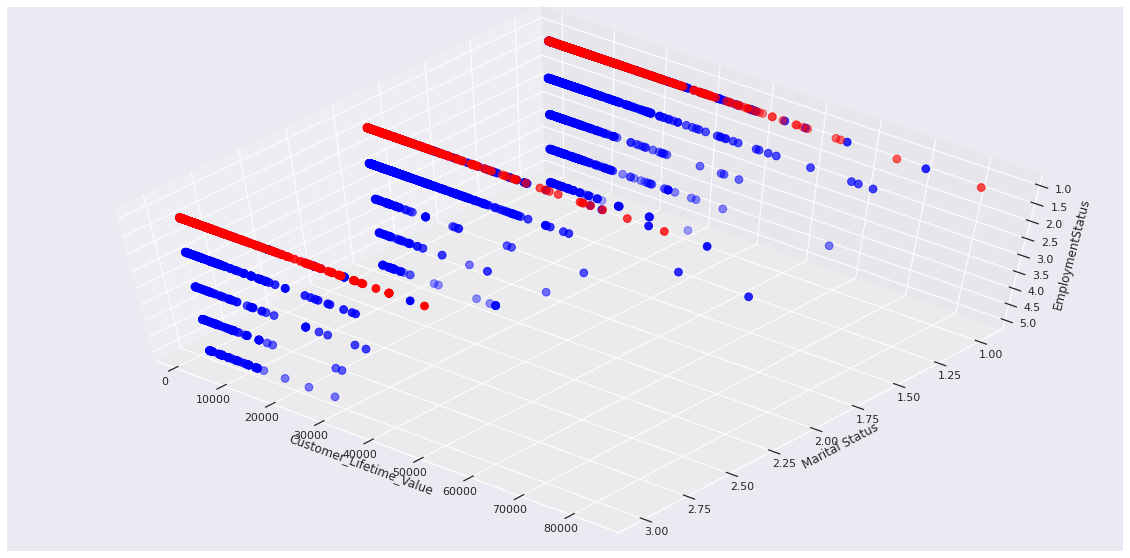

In [46]:
km = KMeans(n_clusters=2)
clusters = km.fit_predict(data.iloc[:,1:])
data["cluster"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Customer_Lifetime_Value[data.cluster == 0], data["Marital Status"][data.cluster == 0], data["EmploymentStatus"][data.cluster == 0], c='blue', s=60)
ax.scatter(data.Customer_Lifetime_Value[data.cluster == 1], data["Marital Status"][data.cluster == 1], data["EmploymentStatus"][data.cluster == 1], c='red', s=60)
ax.view_init(300, 50)
plt.xlabel("Customer_Lifetime_Value")
plt.ylabel("Marital Status")
ax.set_zlabel('EmploymentStatus')
plt.show()

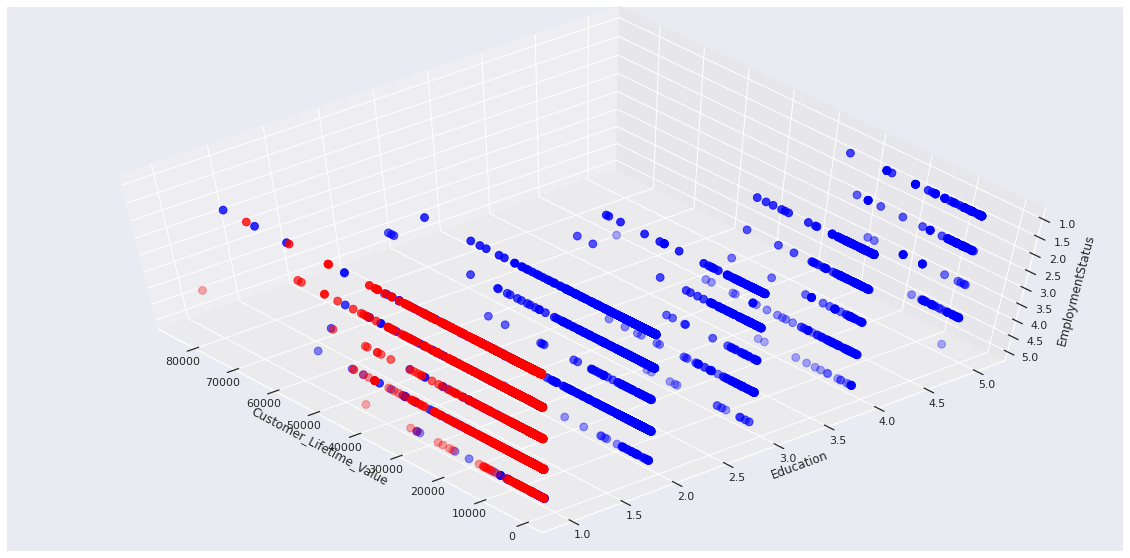

In [47]:
km = KMeans(n_clusters=2)
clusters = km.fit_predict(data.iloc[:,1:])
data["cluster"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Customer_Lifetime_Value[data.cluster == 0], data["EmploymentStatus"][data.cluster == 0], data["Education"][data.cluster == 0], c='blue', s=60)
ax.scatter(data.Customer_Lifetime_Value[data.cluster == 1], data["EmploymentStatus"][data.cluster == 1], data["Education"][data.cluster == 1], c='red', s=60)
ax.view_init(-120, 40)
plt.xlabel("Customer_Lifetime_Value")
plt.ylabel("Education")
ax.set_zlabel('EmploymentStatus')
plt.show()